Transformación de los dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

clases=['a01','a02','a03','a04'];
clasescod=codificarClases(clases)
persons=['p1','p2','p3','p4','p5','p6','p7','p8']
personscod = codificarClases(persons)
files=np.zeros(60)

title=np.zeros(45)
features=np.zeros(180)
muestras=np.zeros((180,9120))

flag=1
file = open("dataset.csv", "w", newline='')
data_matrix = []
for posClase, c in enumerate(clases):
    
    for posPerson, p in enumerate(persons):
         for f in range(1,61):
            if f<10:
                 df = pd.read_csv("../Data/"+c+"/"+p+"/s0"+str(f)+".txt",delimiter=',',names=title)
            else:
                 df = pd.read_csv("../Data/"+c+"/"+p+"/s"+str(f)+".txt",delimiter=',',names=title)
            
            salidaMuestra = clasescod[posClase]
            salidaSpeaker = personscod[posPerson]
            vectorsalida=np.zeros(1)
            vectorsalida[0]=salidaMuestra
            vectorspeaker=np.zeros(1)
            vectorspeaker[0]= salidaSpeaker
            matrixSegmentos=df.to_numpy()
            media, varianza, maximo, minimo,transformada=calcularVectorFeatures(matrixSegmentos)
            features=np.concatenate((media,varianza,maximo,minimo,transformada,vectorsalida, vectorspeaker))
            
            data_matrix.append(features)
            
data = np.asarray(data_matrix)
print(data.shape)


C:\Users\USER\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(1920, 227)


In [6]:
w = np.savetxt("dataset_f.csv", data, delimiter=",")

NameError: name 'data' is not defined

In [10]:
spamreader = csv.writer(file)
spamreader.writerow(data)

file.close()

In [7]:
from sklearn import preprocessing
def codificarClases(vectorClases):    
    le = preprocessing.LabelEncoder()
    le.fit(vectorClases)
    list(le.classes_)
    response=le.transform(vectorClases) 
    return response
                         

In [8]:
import math
from scipy.fftpack import fft, ifft
def transformadaFourier(vectorColumna):
    result=np.fft.fft(vectorColumna)
    
    index = math.floor(result.shape[0]/2)
    #print(index)
    result = result.reshape(result.shape[0],1)
    #print(vectorColumna.shape,result.shape, index)
    #print(result)
    vectorPartido=result[62:-1]
    #print(vectorPartido.shape,'vector partido')
 
    vectorabsoluto=np.abs(vectorPartido)
    #print(vectorabsoluto)
    posicionMaxima=np.argmax(vectorabsoluto)
    #print(posicionMaxima)
    return posicionMaxima

In [13]:

def calcularVectorFeatures(MatrixSegmentos):
    medias=np.zeros(45)
    varianzas=np.zeros(45)
    maximos=np.zeros(45)
    minimos=np.zeros(45)
    transformada=np.zeros(45)
    size=MatrixSegmentos.shape
    i=0
    for j in range(0,size[1]):
        vectorEvaluar=MatrixSegmentos[:,j] #Recopilando columna j
        vectoraux=np.reshape(125,1)
        vectoraux=vectorEvaluar
        #print(vectoraux)
        medias[i]=np.mean(vectorEvaluar)
        varianzas[i]=np.var(vectorEvaluar)
        maximos[i]=max(vectorEvaluar)
        minimos[i]=min(vectorEvaluar)
     
        transformada[i]=transformadaFourier(vectorEvaluar)
        #print(result)
        #transformada[i]=result
        #print(transformada[i])
        i=i+1
    return medias,varianzas,maximos,minimos,transformada

    
    

In [24]:
clases=codificarClases(clases)
print(clases)

[0 1 2 3]


In [9]:
import numpy as np
import pandas as pd
import csv
titletwo=np.zeros(225)
df = pd.read_csv("dataset_f.csv", index_col=False, header=None)
print(df.shape)

(1920, 227)


In [10]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
1915,2.620502,-9.392025,1.096891,0.004746,0.019940,-0.003336,-0.260396,0.797912,0.422978,5.763486,...,20.0,2.0,44.0,0.0,23.0,30.0,37.0,39.0,3.0,7.0
1916,2.613423,-9.398851,1.076954,0.002945,0.019623,-0.003357,-0.259043,0.797360,0.422839,5.775472,...,47.0,41.0,28.0,38.0,57.0,7.0,11.0,4.0,3.0,7.0
1917,2.614750,-9.397350,1.090521,0.001259,0.022382,-0.002332,-0.258816,0.798458,0.424859,5.775306,...,36.0,59.0,16.0,29.0,37.0,4.0,61.0,30.0,3.0,7.0
1918,2.620167,-9.397014,1.092198,0.003449,0.018163,-0.000546,-0.261285,0.797249,0.424286,5.763515,...,47.0,31.0,3.0,4.0,57.0,4.0,39.0,39.0,3.0,7.0
1919,2.615565,-9.398614,1.077036,0.002947,0.016205,-0.002618,-0.261380,0.797910,0.423080,5.774897,...,36.0,35.0,6.0,11.0,37.0,35.0,33.0,52.0,3.0,7.0


In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,3.777351,-2.486878,4.648474,0.001616,0.017105,-0.002561,-0.310352,0.197665,-0.334433,2.880359,...,35.952083,37.051563,40.265104,35.010417,39.420313,46.440104,47.362500,45.436979,1.500000,3.500000
std,5.430197,3.665011,3.413925,0.012204,0.009874,0.003101,0.487867,0.484501,0.379487,4.387556,...,18.137073,17.341824,16.321357,19.407881,19.053418,18.190027,18.371247,18.612703,1.118325,2.291885
min,-4.850537,-9.782885,-4.291986,-0.177847,-0.025571,-0.038129,-1.134073,-0.563008,-0.847034,-7.121970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.716694,-3.359809,2.322010,-0.000017,0.017071,-0.003589,-0.741835,-0.301244,-0.710636,-0.281697,...,20.000000,25.000000,29.000000,17.000000,23.000000,35.750000,38.000000,32.000000,0.750000,1.750000
50%,5.625750,-0.914249,4.604968,0.001267,0.019474,-0.002799,-0.286326,0.195445,-0.327284,1.239879,...,39.000000,37.000000,45.000000,38.000000,44.000000,56.000000,59.000000,55.000000,1.500000,3.500000
75%,9.028887,-0.020013,7.709964,0.002807,0.021131,-0.001720,0.195077,0.639759,-0.007163,8.247352,...,50.000000,51.000000,55.000000,53.000000,57.000000,61.000000,61.000000,61.000000,2.250000,5.250000
max,9.799048,1.818098,9.791012,0.316955,0.059545,0.038000,0.512453,1.028973,0.424859,9.525235,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,3.000000,7.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Columns: 226 entries, 0 to 225
dtypes: float64(226)
memory usage: 3.3 MB


In [12]:
df.shape

(1920, 227)

In [66]:
from sklearn.model_selection import GroupKFold
from numpy import random
import math
import numpy.matlib
from scipy import stats
import scipy as sc
import operator
from scipy.spatial import distance

numpy_matrix = df.as_matrix()
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]
X.shape

i=0
groups = np.array(personsLabel)
print(groups.shape)

group_kfold = GroupKFold(n_splits=8)
group_kfold.get_n_splits(X, Y, groups)

for train_index, test_index in group_kfold.split(X, Y, groups):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    media = np.mean(X_train)
    desvia = np.std(X_train)
    Xtrain = sc.stats.stats.zscore(X_train)
    Xtest = (X_test - np.matlib.repmat(media, X_test.shape[0], 1))/np.matlib.repmat(desvia, X_test.shape[0], 1)
    
    #y_est = KNN(Xtrain, y_train, Xtest, 7)
    #error[i] = ErrorClas(y_est, y_test)
    i=i+1
#print (str(np.mean(error))+'++++'+str(np.std(error)))
    

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(1920,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8]}

neigh = KNeighborsClassifier()
#neigh.fit(X, Y) 
groups = np.array(personsLabel)
print(groups)
group_kfold = GroupKFold(n_splits=8)
group_kfold.get_n_splits(X, Y, groups)

clf = GridSearchCV(neigh, parameters, cv=group_kfold)
clf.fit(Xtrain,y_train)
print(clf.best_estimator_)

[0. 0. 0. ... 7. 7. 7.]


ValueError: The 'groups' parameter should not be None.

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


y_predict=clf.best_estimator_.predict(Xtest)
print(y_predict)
print('Accuracy: ', accuracy_score(y_test, y_predict), '\n')
report = classification_report(y_test, y_predict)
print("\nclassification report :\n",report )

[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:  0.4166666666666667 


classification report :
               precision    recall  f1-score   support

         0.0       0.41      0.67      0.51        60
         1.0       0.42      1.00      0.59        60
         2.0       0.00      0.00      0.00     

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, 'Matriz de confusión')

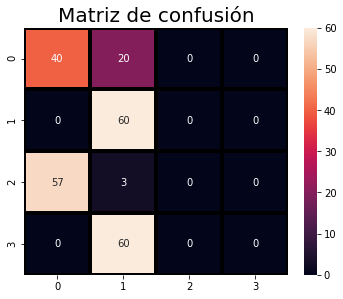

In [36]:
import seaborn as sns

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)